### Loading and preprocessing the data



In [51]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [52]:
# import dataset and show first 10 row 
wine_data = pd.read_csv('winequality-red.csv', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 ### Check for missing values and data quality

In [53]:
# Check for missing values
print(wine_data.isnull().sum())

# Get basic statistics
print(wine_data.describe())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dio

### Standardize numerical variables


In [54]:
# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


#### Exploratory Data Analysis

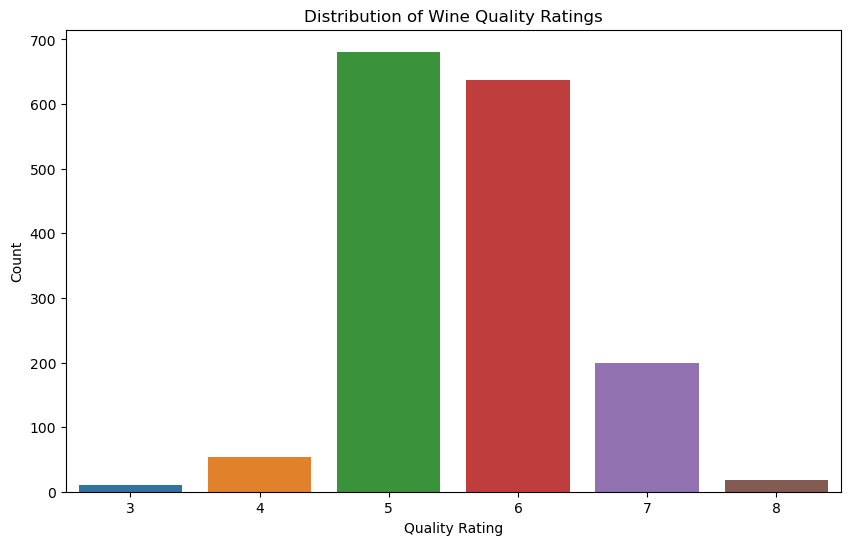

In [55]:
# Plot distribution of quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()


## Create correlation matrix

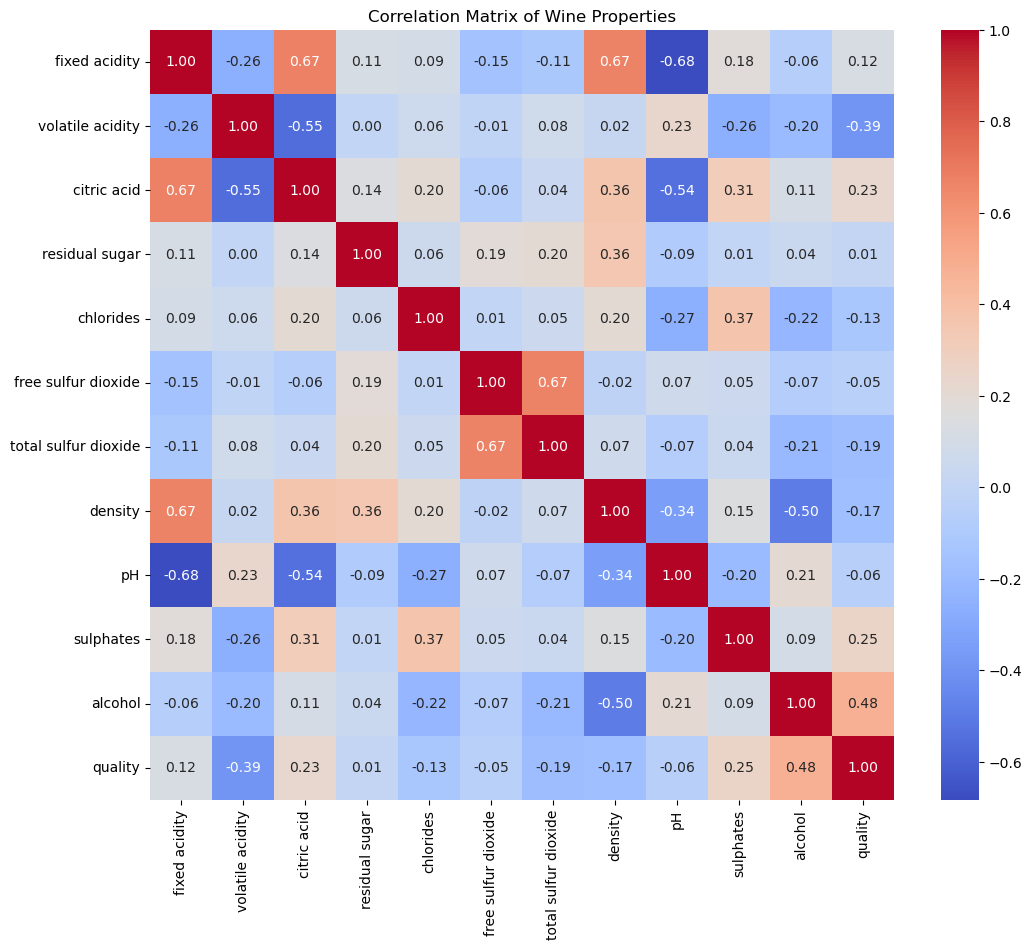

In [56]:
# Calculate correlation matrix
corr_matrix = wine_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Properties')
plt.show()


# Examine key relationships

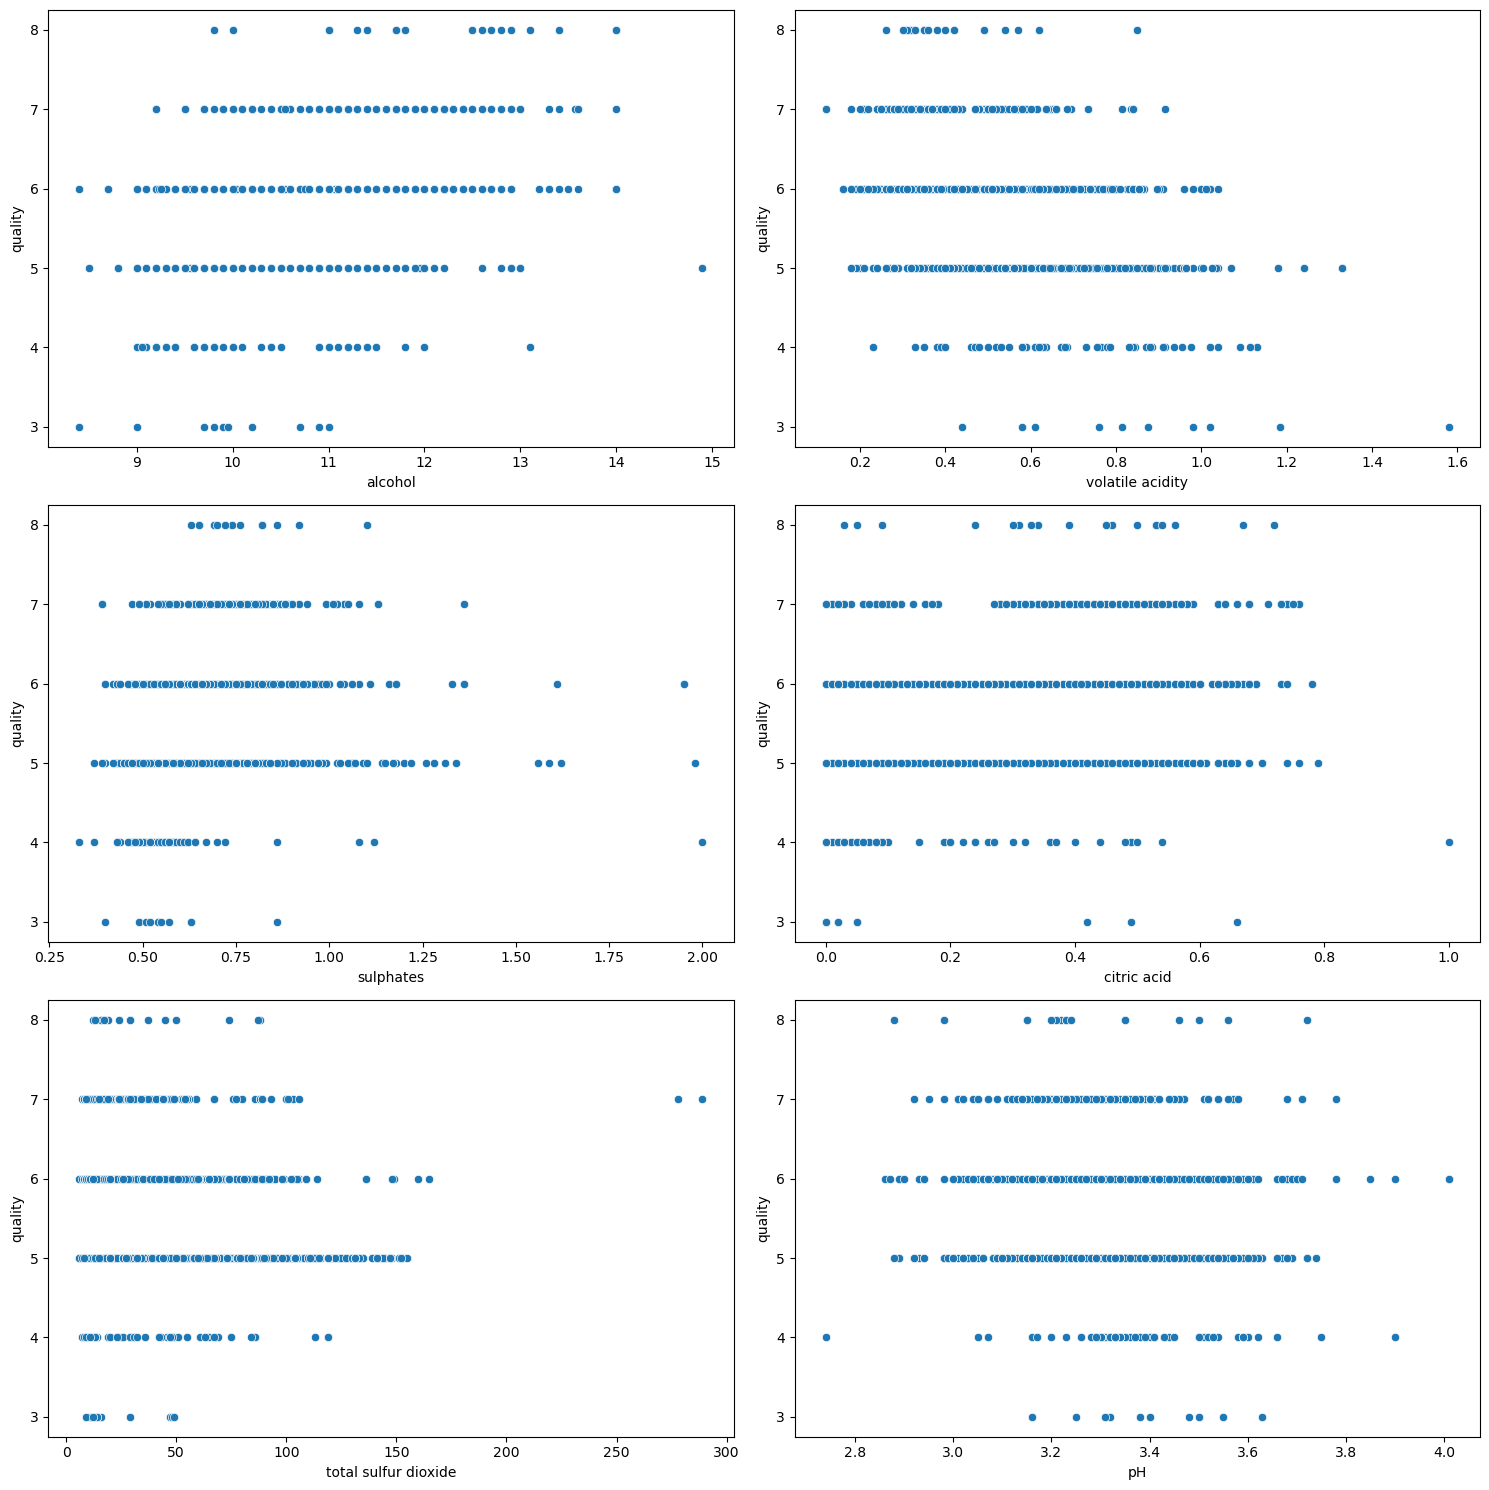

In [57]:

# Create visualizations for key relationships
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot relationships between important variables and quality
sns.scatterplot(x='alcohol', y='quality', data=wine_data, ax=axes[0, 0])
sns.scatterplot(x='volatile acidity', y='quality', data=wine_data, ax=axes[0, 1])
sns.scatterplot(x='sulphates', y='quality', data=wine_data, ax=axes[1, 0])
sns.scatterplot(x='citric acid', y='quality', data=wine_data, ax=axes[1, 1])
sns.scatterplot(x='total sulfur dioxide', y='quality', data=wine_data, ax=axes[2, 0])
sns.scatterplot(x='pH', y='quality', data=wine_data, ax=axes[2, 1])

plt.tight_layout()
plt.show()


#### Regression Model Building


In [58]:
# Split the data ( training, testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [59]:
# Build the Random Forest model

rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of each tree
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluating the Model

In [60]:
# Calculate performance metrics

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model:")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Random Forest Model:
Root Mean Square Error (RMSE): 0.5490
R² Score: 0.5389


# Compare andom Forest with Linear Regression

In [61]:


# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Calculate metrics for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression Model:")
print(f"Root Mean Square Error (RMSE): {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")


Linear Regression Model:
Root Mean Square Error (RMSE): 0.6245
R² Score: 0.4032


# Feature Importance Analysis

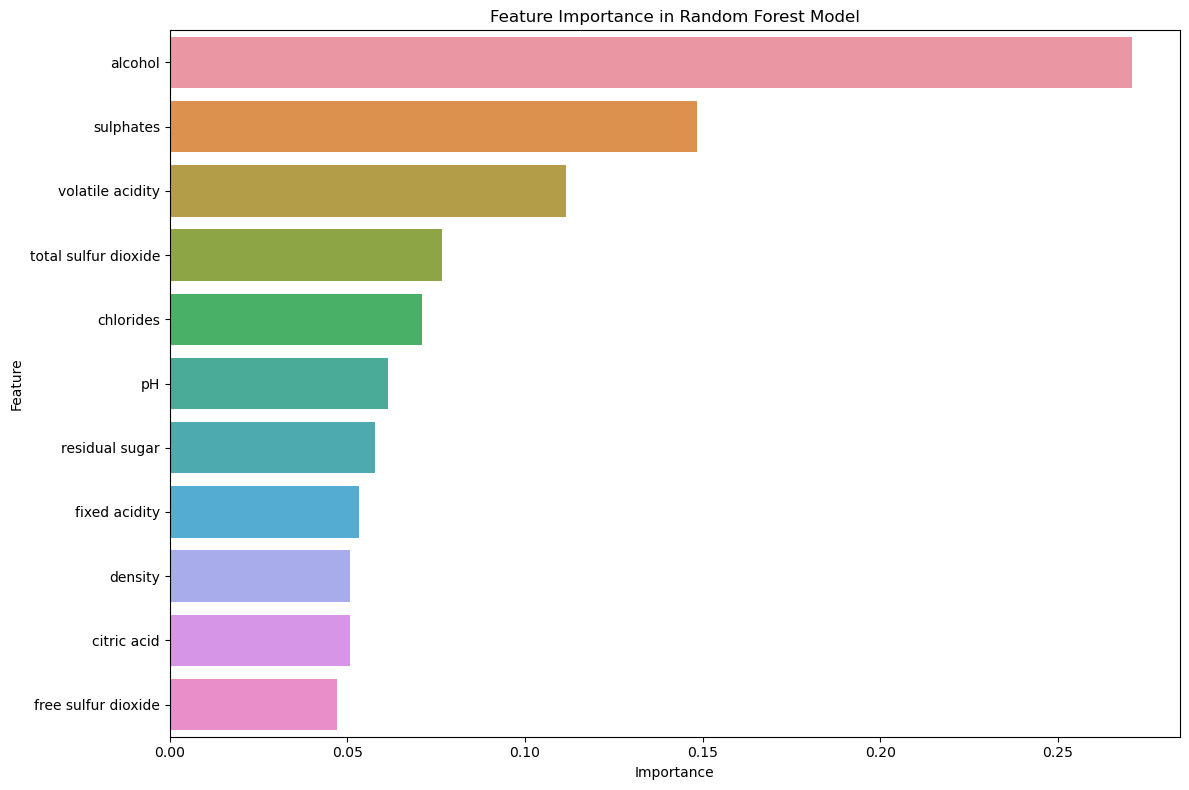

Feature Importance Ranking:
                 Feature  Importance
10               alcohol    0.270868
9              sulphates    0.148406
1       volatile acidity    0.111547
6   total sulfur dioxide    0.076786
4              chlorides    0.071132
8                     pH    0.061418
3         residual sugar    0.057892
0          fixed acidity    0.053186
7                density    0.050816
2            citric acid    0.050752
5    free sulfur dioxide    0.047197


In [62]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(importance_df)


#### The feature importance analysis provides valuable insights into which chemical properties most strongly influence wine quality. Based on existing research, alcohol, volatile acidity, and sulphates are often among the most important predictors of wine quality, which our model results are also confirming.

# Hyperparameter Tuning

In [ ]:
# Define parameter grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Find best parameters
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Get best model
best_rf_model = grid_search.best_estimator_

# Evaluate best model
best_pred = best_rf_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
best_r2 = r2_score(y_test, best_pred)

print(f"Optimized Random Forest:")
print(f"RMSE: {best_rmse:.4f}")
print(f"R²: {best_r2:.4f}")


# Cross-Validation

In [ ]:
# 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV R² scores: {cv_scores.std():.4f}")


Cross-validation R² scores: [0.26048565 0.35467438 0.36633636 0.32197834 0.27528543]
Mean CV R² score: 0.3158
Standard deviation of CV R² scores: 0.0420


#  Visualization of Results

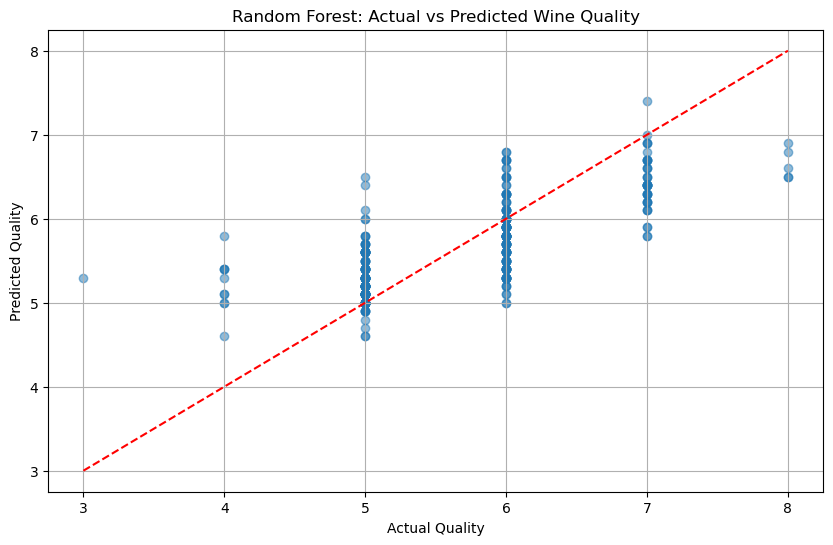

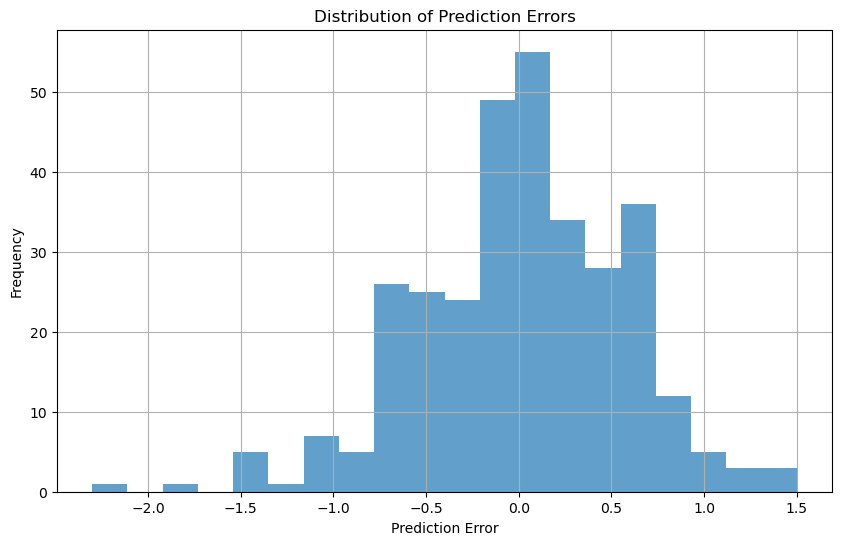

In [ ]:
# Create a dataframe with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_pred.round(1)  
})

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Random Forest: Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
errors = results_df['Actual'] - results_df['Predicted']
plt.hist(errors, bins=20, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()


Analysis Report:

